# Example usage of CNN model

In [ ]:
# load the saved model
model = load_model('my_model.h5')

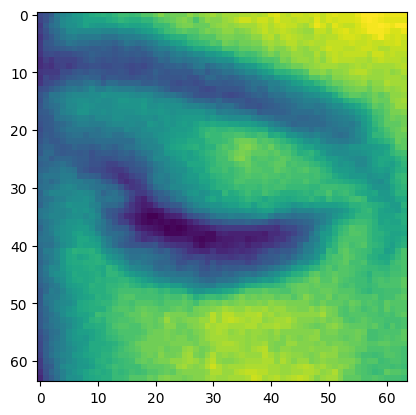

In [ ]:
plt.imshow(x_test[16])
plt.show()

In [ ]:
y_pred= model.predict(x_test)

1/1 [==============================] - 0s 71ms/step


In [ ]:
y_pred_16 = np.argmax(y_pred[16])
y_pred_16

1

# Segmenting Eyes from the Images using HAAR Cascade Classifier

In [ ]:
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/CNN/haarcascade_frontalface_default.xml')
left_eye_cascade = cv2.CascadeClassifier('/content/haarcascade_lefteye_2splits.xml')
right_eye_cascade = cv2.CascadeClassifier('/content/haarcascade_righteye_2splits.xml')

In [ ]:
def eye_open_closed(frame, eye):
  for(x,y,w,h) in eye:
    eye_ = frame[y:y+h, x:x+w]
    eye_ = cv2.cvtColor(eye_, cv2.COLOR_BGR2GRAY)
    eye_ = cv2.resize(eye_, (64,64))
    eye_ = eye_/255
    eye_ = eye_.reshape(64,64,-1)
    eye_ = np.expand_dims(eye_, axis=0)
    pred = model.predict(eye_)
    if(np.argmax(pred)==0):
      return "open"
    else:
      return "closed"

In [ ]:
def extr_left_right_eye(frame):
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.3, 5)
  left_eye = left_eye_cascade.detectMultiScale(gray)
  right_eye = right_eye_cascade.detectMultiScale(gray)
  for(x,y,w,h) in faces:
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)
  for (ex, ey, ew, eh) in left_eye:
    cv2.rectangle(frame, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
  return left_eye, right_eye, frame

In [ ]:
def eye_lbl(l_eye_lbl, r_eye_lbl):
  if(l_eye_lbl=="closed" and r_eye_lbl=="closed"):
    return "closed"
  else:
    return "open"

# Example Usage

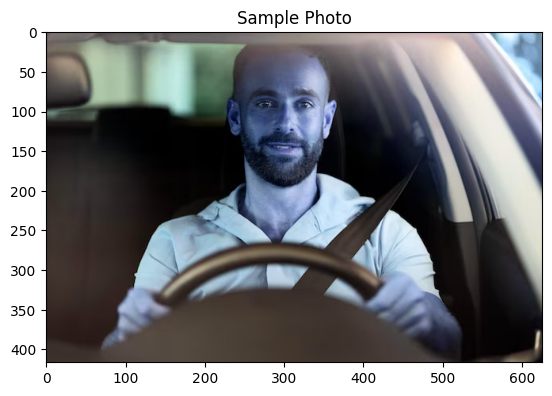

In [ ]:
pic = cv2.imread('/content/open_eye_driving.jpg')
plt.imshow(pic)
plt.title("Sample Photo")
plt.show()

In [ ]:
leye, reye, pic_boxed = extr_left_right_eye(pic)
l_eye_lbl = eye_open_closed(pic, leye)
r_eye_lbl = eye_open_closed(pic, reye)

1/1 [==============================] - 0s 26ms/step


In [ ]:
eye_lbl(l_eye_lbl, r_eye_lbl)

'open'

Our model says that the driver is definitely awake and his eyes are open.

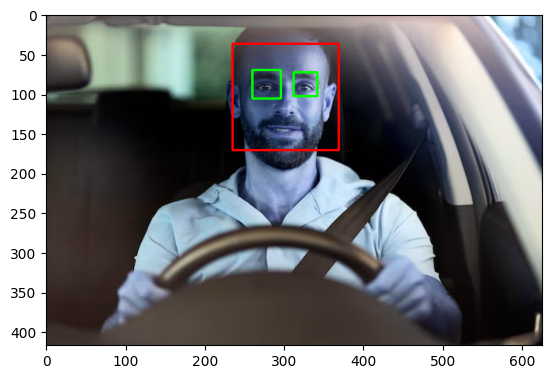

In [ ]:
plt.imshow(pic_boxed)
plt.show()